# PROBLEM STATEMENT
### Prepare rules for the all the data sets

Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
 Change the minimum length in apriori algorithm
 Visualize the obtained rules using different plots



In [16]:
# installing the mlxtend
#!pip install mlxtend

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings 
warnings.filterwarnings('ignore')

# Importing CSV File

In [4]:
df = pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# EDA

In [5]:
# checking the information about datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
df.count()

ChildBks     2000
YouthBks     2000
CookBks      2000
DoItYBks     2000
RefBks       2000
ArtBks       2000
GeogBks      2000
ItalCook     2000
ItalAtlas    2000
ItalArt      2000
Florence     2000
dtype: int64

In [7]:
# getting the statistical values
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(2000, 11)

In [9]:
# creating total of each item bought
s=df.sum()
s

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

# Visualization

<AxesSubplot:>

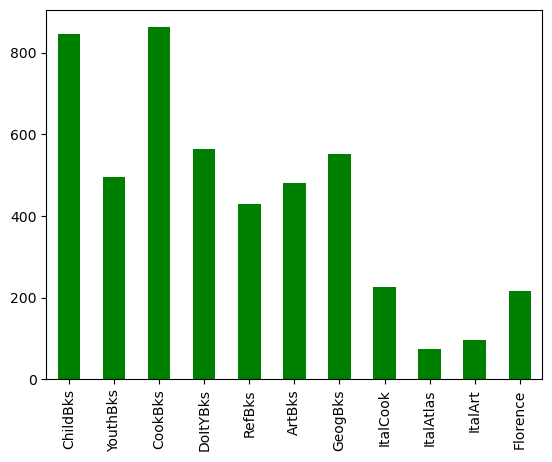

In [11]:
s.plot.bar(color= 'green')

### inference
The top three books bought by customers according to transaction record are: ChildBks, CookBks,GeogBks

### A. Apriori algorithm with iterating support values and keeping min confidence=0.5

In [13]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df, min_support=s, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [14]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,594,3272
1,0.02,276,1004
2,0.03,181,558
3,0.04,133,372
4,0.05,100,260


<AxesSubplot:xlabel='Minimum support', ylabel='Association rules number'>

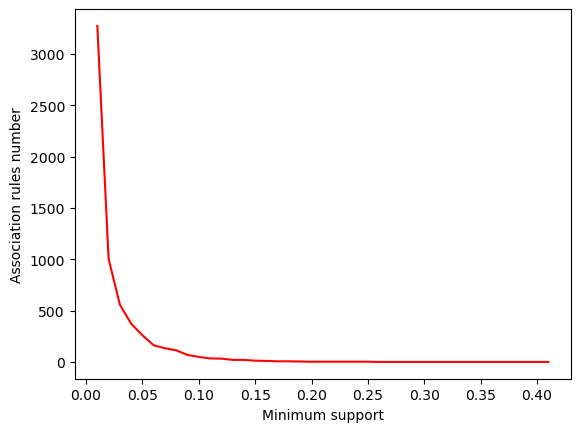

In [17]:
import seaborn as sns
sns.lineplot(data=sup_rules, x="Minimum support", y="Association rules number",color='r')

### inference
The above plot shows that as minimum support value increases the number of association rules formed decreases.This is because with increase in support value,the number of frequent item sets generated decreases.Less number of frequent sets means less number of rules formed.

### 2. Apriori algorithm with iterating confidence values and min support =0.01

In [19]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [20]:
a={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(a)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,594,9079
1,0.125,594,8420
2,0.150,594,7926
3,0.175,594,7528
4,0.200,594,7163


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

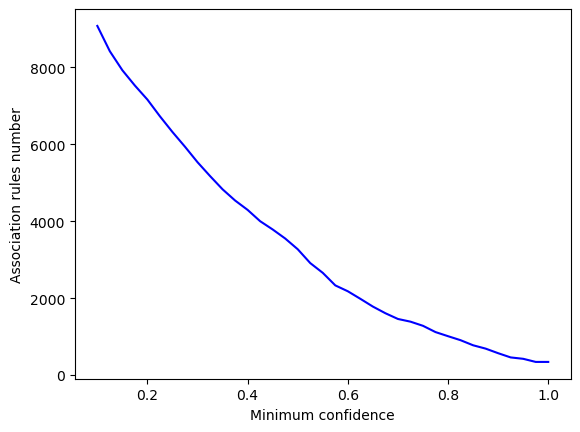

In [22]:
import seaborn as sns
sns.lineplot(data=conf_rules, x="Minimum confidence", y="Association rules number",color='b')

### inference
The graph shows that as threshold of confidence is increased,the number of association rules get decreased.This is because with higher thresholds, fewer frequent itemsets are generated as few qualify for increased threshold values.

# B. Changing min length in apriori algorithm and observing the changes in association rules.
Here min support is considered as 0.01 and min confidence as 0.5

In [23]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,100):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 99


In [24]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()

,Length_itemset,Frequent itemsets,Association rules number
0,1,11,0
1,2,65,32
2,3,208,317
3,4,408,1167
4,5,547,2366


(0.0, 3435.6)

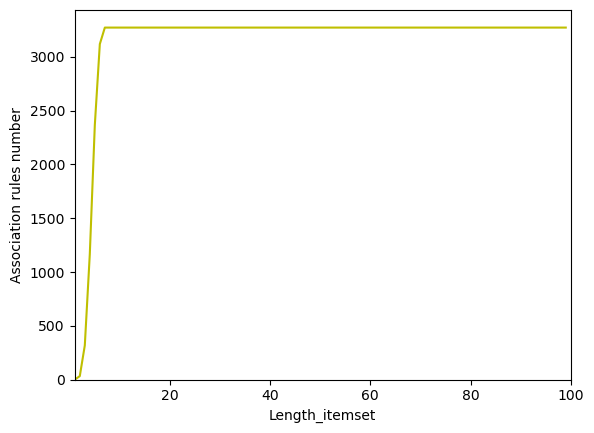

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=itemset_rules, x="Length_itemset", y="Association rules number",color='y')
plt.xlim(1,100)
plt.ylim(0,)

### inference
The graph shows that with increase in length of itemsets till 10, the number of association rules keep on increasing. Beyond length 10,the number of rules become constant. 

# C. Association Rules generation by running Apriori with min support=0.01 and min confidence=0.5

# generating frequent itemset

In [30]:
frequent_itemsets= apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [31]:
print("Number of frequent itemsets generated with min support 0.01 is:",(frequent_itemsets.shape[0]))

Number of frequent itemsets generated with min support 0.01 is: 594


# adding a length column which stores the length of item sets generated

In [32]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [33]:
frequent_itemsets.head()

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1


#### checking the number of frequent itemsets generated for each length...?

In [34]:
frequent_itemsets['length'].value_counts()

4    200
3    143
5    139
2     54
6     43
1     11
7      4
Name: length, dtype: int64

The maximum number of frequent itemsets generated are of length 4.

In [35]:
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
...,...,...,...,...,...,...,...,...,...,...
2174,"(ItalAtlas, ItalArt, CookBks)","(ArtBks, RefBks, ChildBks, ItalCook)",0.0130,0.0220,0.0110,0.846154,38.461538,0.010714,6.357000,0.986829
2175,"(RefBks, ItalArt, CookBks)","(ArtBks, ItalAtlas, ChildBks, ItalCook)",0.0165,0.0115,0.0110,0.666667,57.971014,0.010810,2.965500,0.999237
2176,"(ItalAtlas, ItalArt, RefBks)","(ArtBks, CookBks, ChildBks, ItalCook)",0.0165,0.0455,0.0110,0.666667,14.652015,0.010249,2.863500,0.947382
2177,"(ArtBks, ItalAtlas)","(ChildBks, CookBks, ItalCook, RefBks, ItalArt)",0.0180,0.0145,0.0110,0.611111,42.145594,0.010739,2.534143,0.994168


### Checking statistical summary of rules generated..?


rules.describe()

In [36]:
print("Total number of association rules generated:",(rules.shape[0]))

Total number of association rules generated: 2179


# Visualization 

## 1. Using Scatter Plot

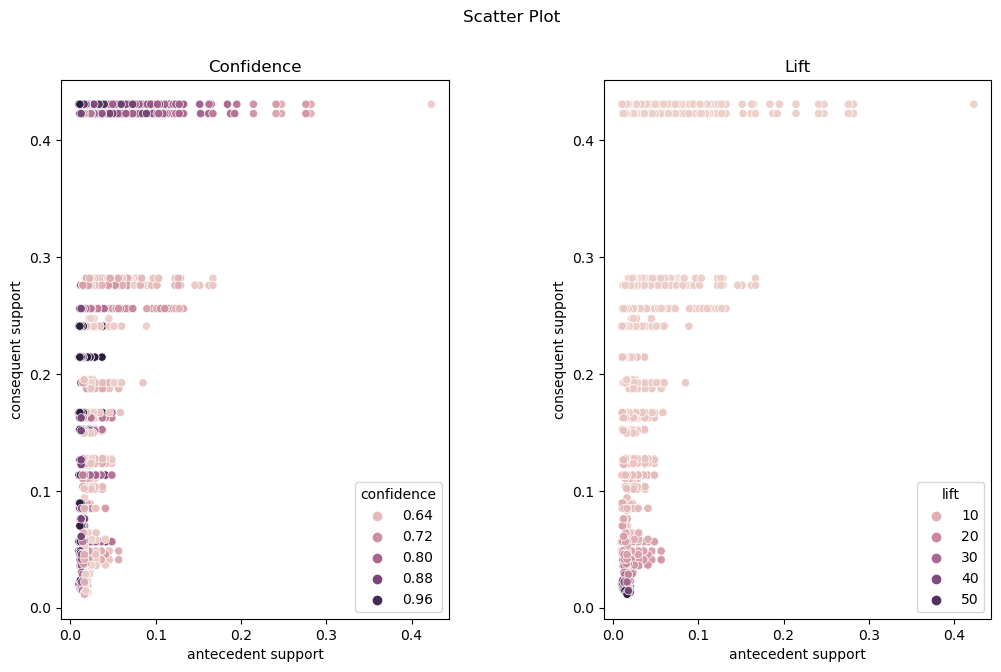

In [38]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

+ The first subplot shows relationship of antecedent and consequent support with confidence which is shown in color gradient.Deep colors indicate high confidence and light colors indicate low confidence.We can see that dark points are concentrated near lower values of x axis.This means high confidence is observed for lower antecedent support values.


+ The second subplot shows  relationship of lift with antecedent and consequent support.Dark color indicates highest lift values.The plot shows taht maximum rules have lift values in range 10-30. Higher values around 40-50 is almost minimal and that too found for very low antecedent and consequent support.

## 2. Heatmap

To generate heatmap,a subset of first ten rules will be considered to avoid overcrowding of map and enhance clarity of map.

In [39]:
rules_map=rules.copy()

##### selecting rules with high confidence,lift and support

In [40]:
rules_map=rules_map.loc[(rules_map['lift']>10)& (rules_map['confidence']>0.70)& (rules_map['support']>0.02)]

In [41]:
rules_map.reset_index(drop=True,inplace=True)

#### creating a subset of first 10 rules which will be plotted with heatmap

In [42]:
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
1,"(ChildBks, ItalArt)","(ArtBks, ItalCook)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
2,"(ItalAtlas, CookBks)","(ItalCook, RefBks)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864,0.970026
3,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
4,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
5,"(DoItYBks, ItalArt)","(ArtBks, ItalCook)",0.0300,0.0565,0.0250,0.833333,14.749263,0.023305,5.661000,0.961031
6,"(GeogBks, ItalArt)","(ArtBks, ItalCook)",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591,0.958838
7,"(ChildBks, ItalArt, CookBks)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000,0.969615
8,"(ChildBks, ItalArt)","(ArtBks, CookBks, ItalCook)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
9,"(DoItYBks, ItalArt, CookBks)","(ArtBks, ItalCook)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250,0.965036


### converting antecedents and consequents to strings

In [43]:
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))

In [44]:
print(rules_10[['antecedents','consequents']])

                antecedents              consequents
0                   ItalArt          ArtBks,ItalCook
1          ChildBks,ItalArt          ArtBks,ItalCook
2         ItalAtlas,CookBks          ItalCook,RefBks
3           ItalArt,CookBks          ArtBks,ItalCook
4                   ItalArt  ArtBks,CookBks,ItalCook
5          DoItYBks,ItalArt          ArtBks,ItalCook
6           GeogBks,ItalArt          ArtBks,ItalCook
7  ChildBks,ItalArt,CookBks          ArtBks,ItalCook
8          ChildBks,ItalArt  ArtBks,CookBks,ItalCook
9  DoItYBks,ItalArt,CookBks          ArtBks,ItalCook


# Constructing  pivot table

In [45]:
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')

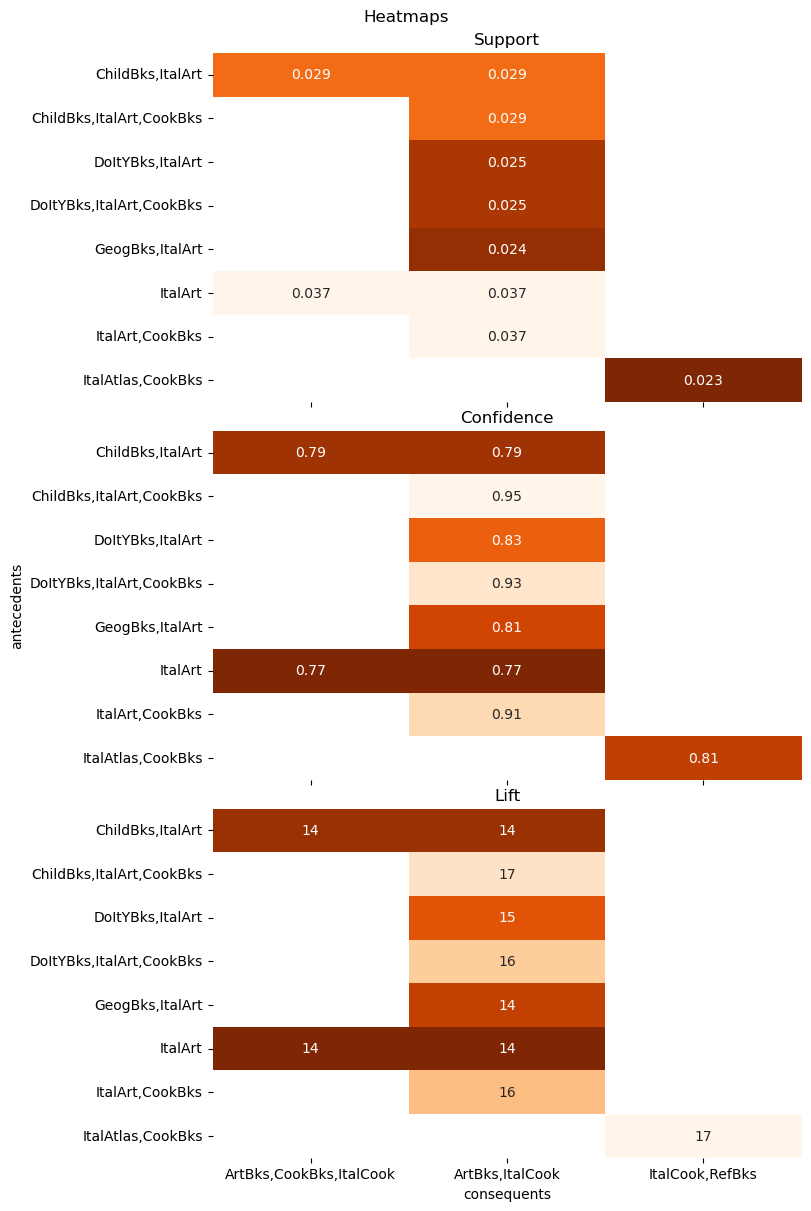

In [48]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Oranges_r')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Oranges_r')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Oranges_r')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()

+ Darker cells imply higher support/confidence/lift values. The blank/white cells imply that no association rule was formed for those antecedent-->sconsequent pairs.
+ The first subplot shows correlation with support values. The highest support is 0.037 for (ItalArt,CookBks)-->(ItalCook,ArtBks).
+ The second subplot shows that consequent(ItalCook,ArtBks) have high confidence for all its antecedents except (CookBks,ItalAtlas) for which no rule was formed.
+ In third subplot, it can be seen (ItalCook,ArtBks) have high lift values for all its antecedents except one.
+ It can be said that (ItalCook,ArtBks) is a very significant consequent i.e these two items have a high change of getting purchased by customers if their antecedents are purchased.

## 3.Parallel Coordinate Plots

In [49]:
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,ItalArt,"ArtBks,ItalCook",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
1,"ChildBks,ItalArt","ArtBks,ItalCook",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
2,"ItalAtlas,CookBks","ItalCook,RefBks",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864,0.970026
3,"ItalArt,CookBks","ArtBks,ItalCook",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
4,ItalArt,"ArtBks,CookBks,ItalCook",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
5,"DoItYBks,ItalArt","ArtBks,ItalCook",0.0300,0.0565,0.0250,0.833333,14.749263,0.023305,5.661000,0.961031
6,"GeogBks,ItalArt","ArtBks,ItalCook",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591,0.958838
7,"ChildBks,ItalArt,CookBks","ArtBks,ItalCook",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000,0.969615
8,"ChildBks,ItalArt","ArtBks,CookBks,ItalCook",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
9,"DoItYBks,ItalArt,CookBks","ArtBks,ItalCook",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250,0.965036


In [50]:
# creating a column called 'rule no' to store rule numbers
rules_10['rule no']=np.arange(1,11)
data=rules_10.iloc[:,[0,1,9]]
data

,antecedents,consequents,zhangs_metric
0,ItalArt,"ArtBks,ItalCook",0.974174
1,"ChildBks,ItalArt","ArtBks,ItalCook",0.963311
2,"ItalAtlas,CookBks","ItalCook,RefBks",0.970026
3,"ItalArt,CookBks","ArtBks,ItalCook",0.978339
4,ItalArt,"ArtBks,CookBks,ItalCook",0.974174
5,"DoItYBks,ItalArt","ArtBks,ItalCook",0.961031
6,"GeogBks,ItalArt","ArtBks,ItalCook",0.958838
7,"ChildBks,ItalArt,CookBks","ArtBks,ItalCook",0.969615
8,"ChildBks,ItalArt","ArtBks,CookBks,ItalCook",0.963311
9,"DoItYBks,ItalArt,CookBks","ArtBks,ItalCook",0.965036


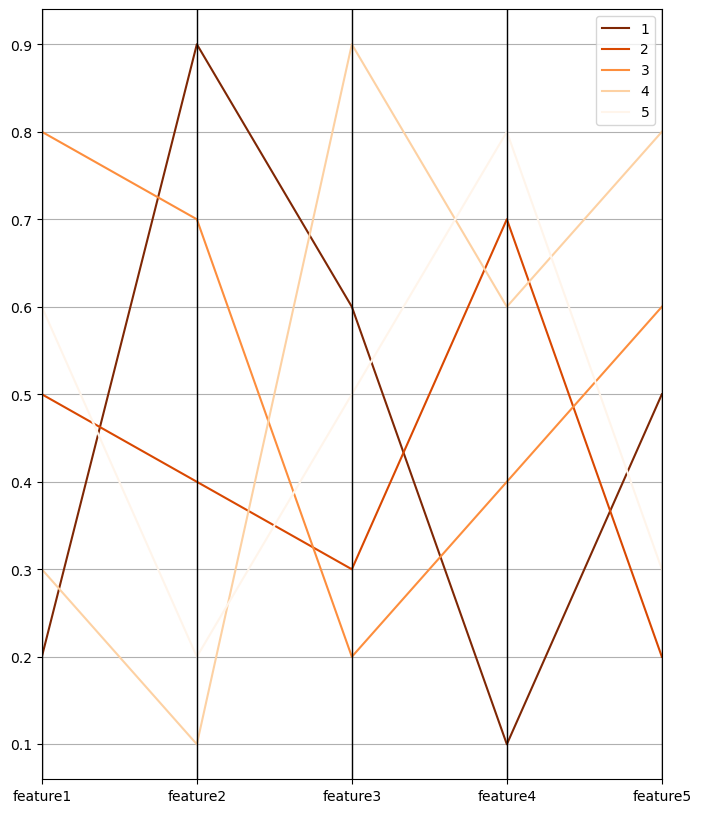

In [51]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({
    'rule no': [1, 2, 3, 4, 5],
    'feature1': [0.2, 0.5, 0.8, 0.3, 0.6],
    'feature2': [0.9, 0.4, 0.7, 0.1, 0.2],
    'feature3': [0.6, 0.3, 0.2, 0.9, 0.5],
    'feature4': [0.1, 0.7, 0.4, 0.6, 0.8],
    'feature5': [0.5, 0.2, 0.6, 0.8, 0.3]
})

plt.figure(figsize=(8, 10))
parallel_coordinates(data, 'rule no', colormap='Oranges_r')
plt.show()


### Inference
+ In above plot,the line represents association rules.It shows rules formed between each antecedent and consequent pair.Absence of lines imply no rules were formed for that antecedent--> consequent pair.
+ The plot gives only an idea of association rules present or absent for antecedent-->consequent pair.No information about metrics such as lift or support are provided by parallel coordinates plot.
+ The graph shows association present between (ItalArt)-->(ItalCook,CookBks,ArtBks),(ItalArt,ChildBks)-->(ItalCook,ArtBks)etc.
+ We can see no association rule found for these pairs:(ItalCook,Artbks)-->(ItalArt,ChildBks),(ItalArt,ChildBks)-->(ItalAtlas,CookBks)etc.